<font color='red' size='5px'/>Augmentation In Computer Vision<font/>

In [ ]:
from IPython.display import Image

## 1 Augmetation Tech

Augmentation techniques help in increasing the diversity and quantity of training data, which can improve the generalization and performance of computer vision models.

It's crucial to apply these techniques judiciously to avoid creating unrealistic or misleading data. Augmentation is a powerful tool, but it should be used thoughtfully to enhance the model's performance without compromising its ability to generalize to real-world scenarios. Let's delve into some common augmentation techniques used in computer vision:

1.	**Image Flipping:** Flipping an image horizontally or vertically can be a simple yet effective augmentation technique. For example, flipping a cat image horizontally would create a new image that shows the cat facing the opposite direction.

2.	**Rotation:** Rotating an image by a certain angle can help the model become invariant to rotation in the test data. It is especially useful when the orientation of objects is not always consistent.

3.	**Scaling:** Scaling an image up or down can help the model handle objects of different sizes in the test data.

4.	**Translation:** Shifting an image horizontally or vertically can help the model learn to identify objects in different positions within the image.

5.	**Brightness and Contrast Adjustment:** Changing the brightness and contrast of an image can make the model more robust to varying lighting conditions.

6.	**Color Jittering:** Randomly modifying the hue, saturation, and brightness of an image can help the model generalize better to different color variations.

7.	**Random Crop:** Randomly cropping a part of an image can help the model focus on relevant features and improve its ability to handle partial object occlusions.

8.	**Gaussian Noise:** Adding random Gaussian noise to the image can improve the model's resilience to noise in real-world scenarios.

9.	**Elastic Transformations:** Applying elastic deformations to the image can simulate natural deformations, making the model more robust to object distortions.

10.	**Cutout:** Randomly masking out rectangular regions of an image can improve the model's ability to handle occlusions.

11.	**Mixup:** Mixup involves blending two or more images and their corresponding labels to create new training samples, promoting smoother decision boundaries and reducing overfitting.

12.	**Style Transfer:** Incorporating style transfer techniques can change the appearance of objects and backgrounds in images, increasing the diversity of training data.





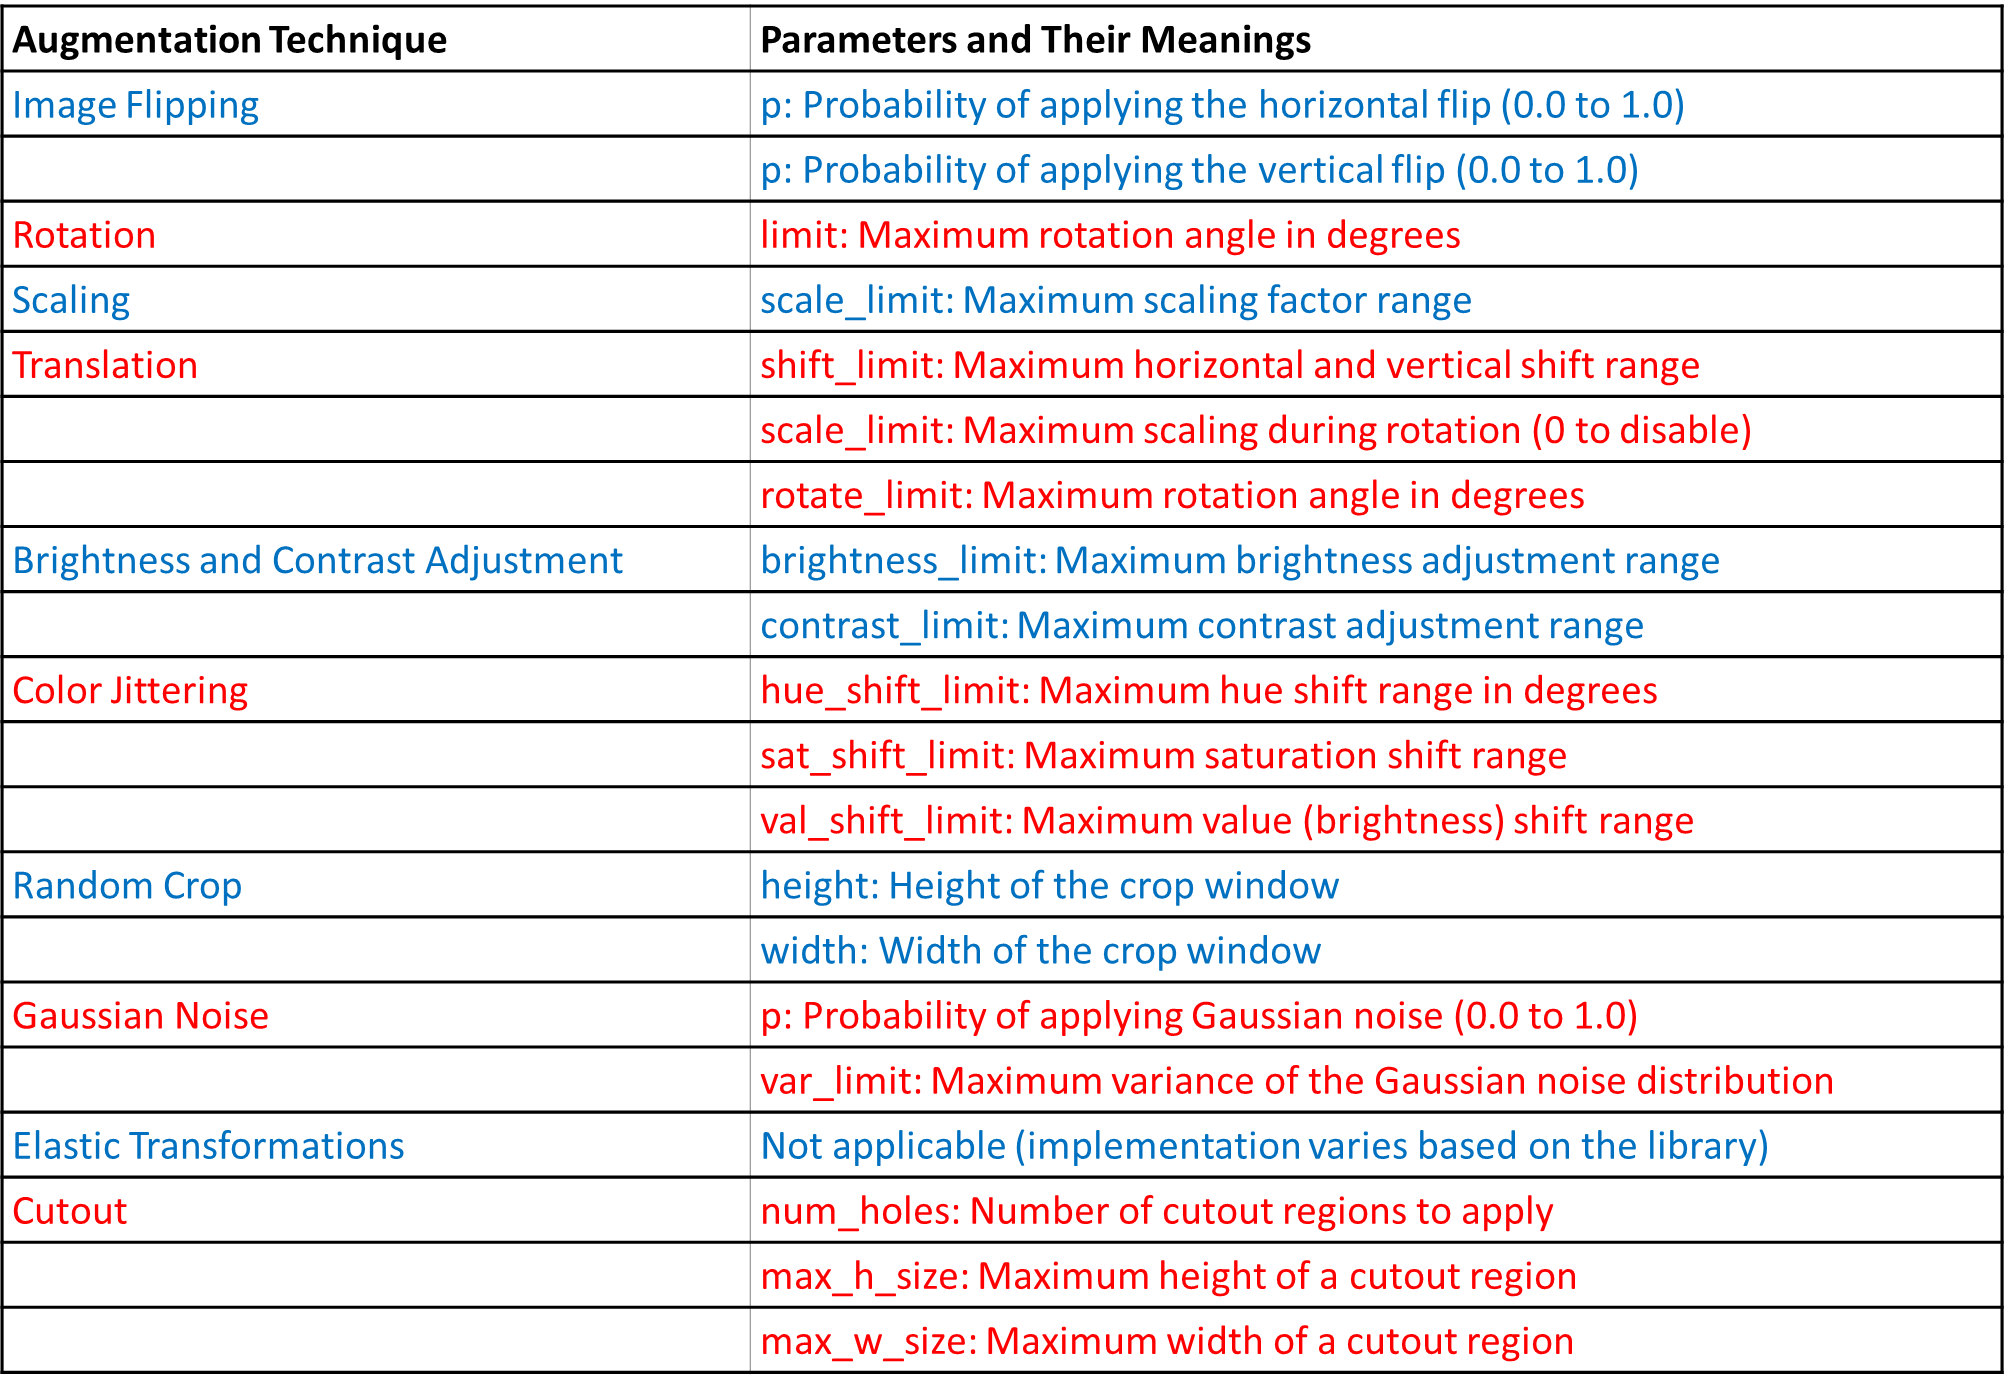

## 2 Augmentation Libraries

Augmentation Libraries can save you time and effort in implementing augmentation techniques from scratch. Here are some popular libraries:

1.	**imgaug:** imgaug is a powerful library for image augmentation in Python. It supports a wide range of augmentation techniques and is highly configurable. It works well with NumPy arrays and OpenCV images.
GitHub Repository:

 https://github.com/aleju/imgaug


2.	**albumentations:** albumentations is another popular library for fast and efficient image augmentation. It is designed to work seamlessly with deep learning frameworks like PyTorch and TensorFlow.
GitHub Repository:

 https://github.com/albumentations-team/albumentations

3.	**Keras ImageDataGenerator**: If you're working with Keras for deep learning, the ImageDataGenerator class in the Keras library provides built-in image augmentation capabilities.
Documentation:

 https://keras.io/api/preprocessing/image/

4.	**torchvision.transforms:** If you're using PyTorch for your computer vision tasks, the torchvision.transforms module provides a set of commonly used data augmentation techniques.
Documentation:

 https://pytorch.org/vision/stable/transforms.html

5.	**TensorFlow Data Augmentation Layers:** TensorFlow also offers built-in data augmentation layers through the tf.keras.layers.experimental.preprocessing module.
Documentation:

 https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing



## 3 Albumentations Example

In [ ]:
pip install albumentations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the input image
image = cv2.imread('/content/drive/MyDrive/Datasets/Computer_Vision/Weldment /Weld_classification/test/test/good/IMG_20170614_121222933.jpg')

In [ ]:
image.shape

(2340, 4160, 3)

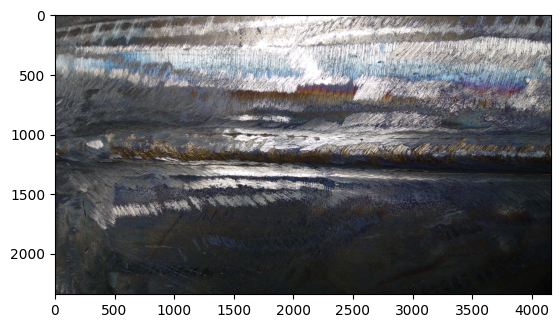

In [ ]:
plt.imshow(image)

In [ ]:
import cv2
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Load the input image
image = cv2.imread('/content/drive/MyDrive/Datasets/Computer_Vision/Weldment /Weld_classification/test/test/good/IMG_20170614_121222933.jpg')

# Define the augmentations
transform = A.Compose([
    # Image Flipping
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),

    # Rotation
    A.Rotate(limit=30, p=0.5),

    # Scaling
    A.RandomScale(scale_limit=0.5, p=0.5),

    # Translation
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.0, rotate_limit=0, p=0.5),

    # Brightness and Contrast Adjustment
    A.RandomBrightnessContrast(p=0.5),

    # Color Jittering
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),

    # Random Crop
    A.RandomCrop(height=100, width=100, p=0.5),

    # Gaussian Noise
    A.GaussNoise(p=0.5),

    # Cutout
    A.Cutout(num_holes=1, max_h_size=50, max_w_size=50, p=0.5),

    # Convert the image to a tensor (for PyTorch)
    ToTensorV2(),
])

import numpy as np



# Apply the augmentations to the transposed image
augmented_image = transform(image=image)['image']




/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


In [ ]:
augmented_image.shape

torch.Size([3, 100, 100])

In [ ]:
# Transpose the image array to the correct shape
image_transposed = np.transpose(augmented_image, (2, 1, 0))

In [ ]:
image_transposed.shape

torch.Size([100, 100, 3])

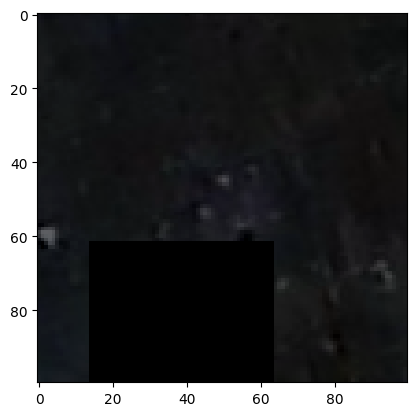

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image_transposed)

## 4 Stable Diffusion & Augmentation

### 4.1 Stable Diffusion Overview [Click Here](https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/)

 Stable Diffusion is an open-source text-to-image generation model offered by KerasCV. It allows users to generate new images based on text prompts and is known for its high-performance image generation capabilities, thanks to features like XLA compilation and mixed precision support

1. **Stable Difusion:**

  - Stable diffusion, also known as diffusion models or diffusion probabilistic models, is a class of generative models that can be used for tasks such as image generation, denoising, inpainting, and super-resolution.
  
  - Stable diffusion models are **based on the concept of iteratively transforming a simple distribution**(e.g., Gaussian) into a complex data distribution.


  - The core idea behind stable diffusion is to define a sequence of diffusion steps, where **each step transforms the data distribution to become closer to the target distribution**. This is achieved by applying a series of invertible transformations to the data, often referred to as diffusion steps or time steps.

  -  These transformations are typically implemented using neural networks, such as invertible neural networks or normalizing flows.

  - The diffusion steps are typically defined using a diffusion process, which models the transformation of the data distribution. The diffusion process can be represented as
  
  $$x_t = x_{t-1} + √(2 * α) * η_t$$

  **x_t:** is the data at time step t,
  
  **x_{t-1}:** is the data at the previous time step

  **α** is a diffusion coefficient
  
  **η_t** is a noise term drawn from a standard Gaussian distribution.


2. **XLA:**
  - XLA (Accelerated Linear Algebra) is a domain-specific compiler developed by Google for optimizing and accelerating machine learning computations.
  
  - It is part of the TensorFlow ecosystem and is designed to improve the performance of TensorFlow models by optimizing the linear algebra operations.

  - XLA works by taking TensorFlow computational graphs and optimizing them for specific hardware architectures, such as CPUs or GPUs.

  - By leveraging XLA, you can potentially achieve faster training times and improved performance on hardware accelerators.

3. **Mixed precision**

  - Is the use of both 16-bit and 32-bit floating-point types in a model during training to make it run faster and use less memory.

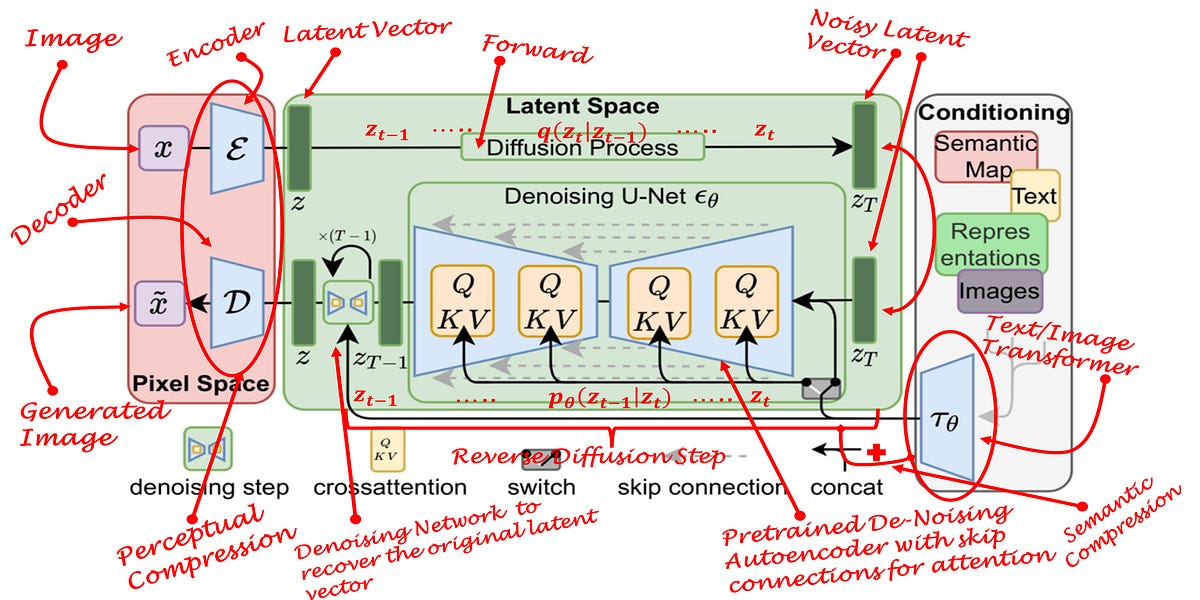

- Stable Diffusion consists of three parts
  - A text encoder, which turns your prompt into a latent vector.
  - A diffusion model, which repeatedly "denoises" a 64x64 latent image patch.
  - A decoder, which turns the final 64x64 latent patch into a higher-resolution 512x512 image.

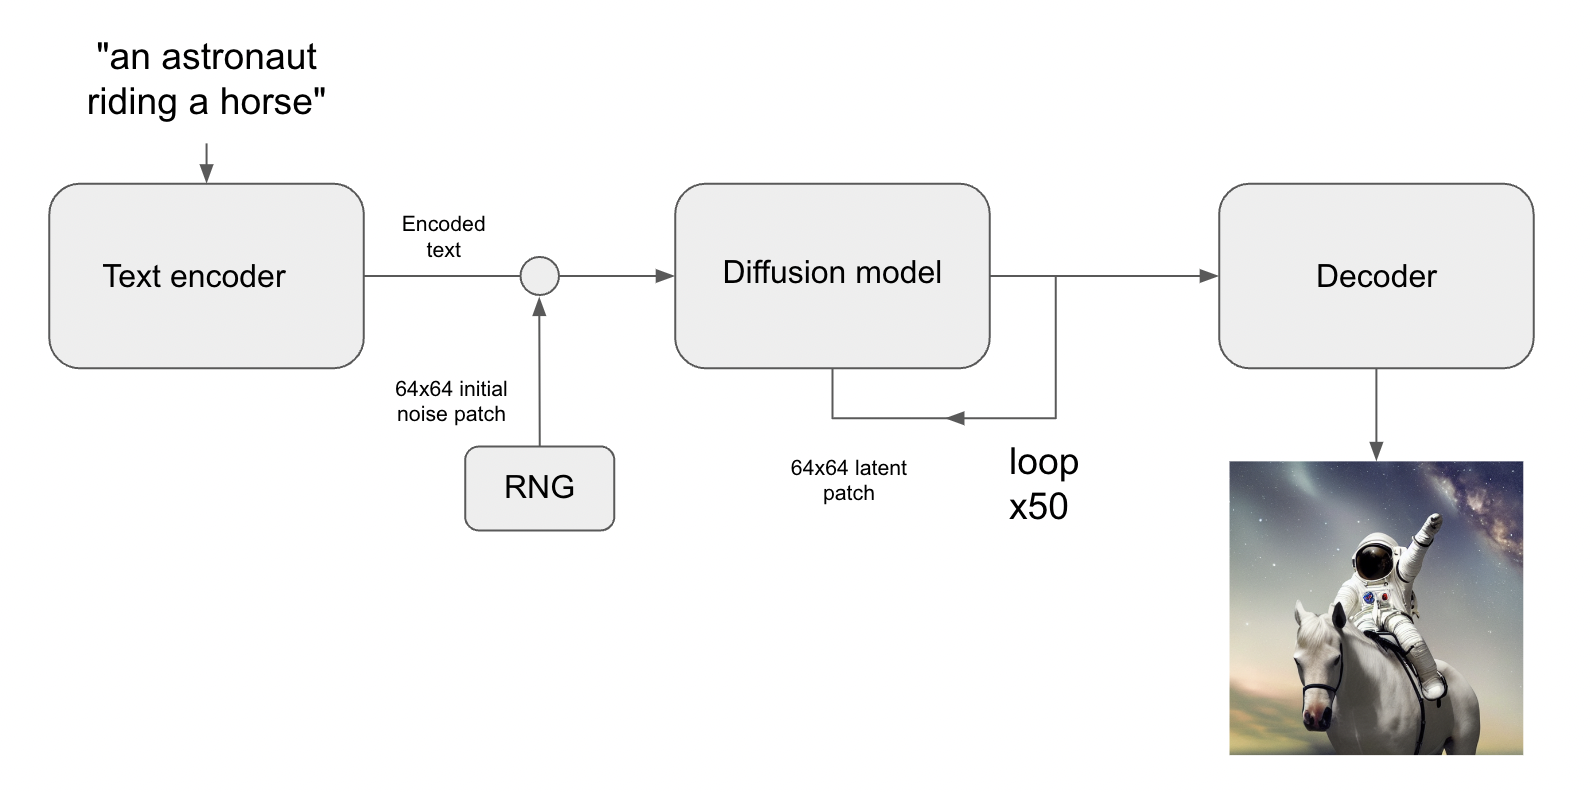

In [ ]:
!pip install --upgrade keras-cv

In [ ]:
!pip install keras_core

In [ ]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

Using TensorFlow backend


In [ ]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [ ]:
# Define the text prompt
prompt = "photograph of an astronaut riding a horse"

# Generate images based on the prompt
images = model.text_to_image(prompt, batch_size=3)


198180272/198180272 [==============================] - 2s 0us/step


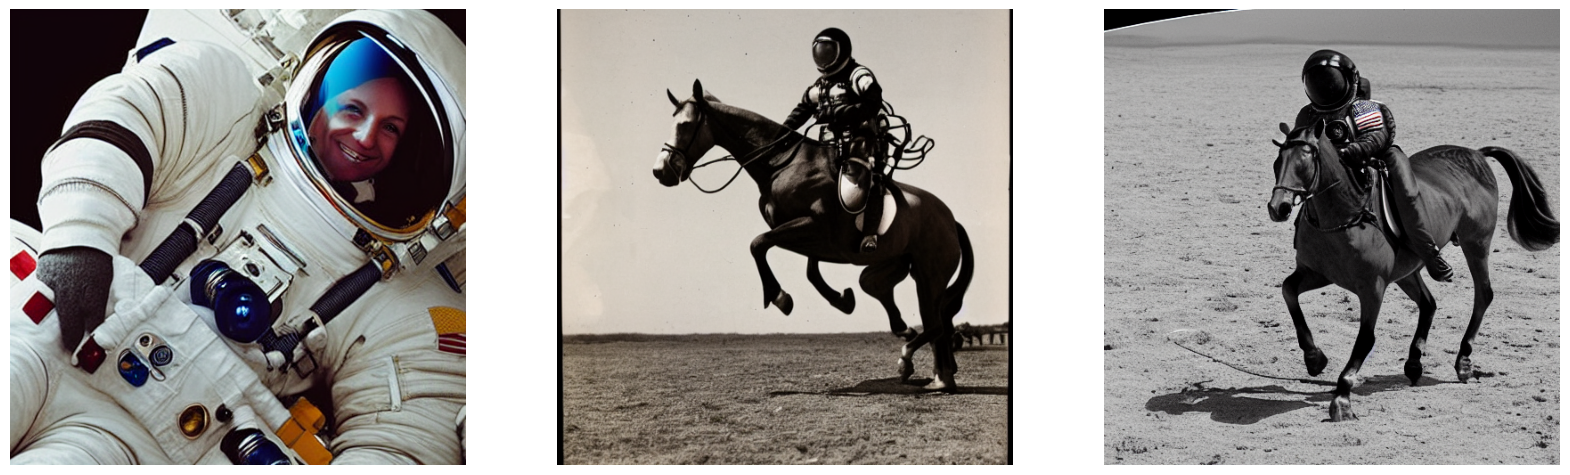

In [ ]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

plot_images(images)
plt.show()

In [ ]:
images = model.text_to_image(
    "cute magical flying dog, fantasy art, "
    "golden color, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, mystery, adventure",
    batch_size=3,
)
plot_images(images)

### 4.2 Stable Diffusion Augmentation

#### 4.2.1 Packages

In [ ]:
!pip install keras-cv-attention-models

In [1]:
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

In [2]:
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


from keras.layers import *
from keras.callbacks import *
from keras.optimizers import *
from keras.models import load_model, Model
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from tensorflow.keras import regularizers
from keras.utils import conv_utils

In [3]:
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras import backend as K
from tensorflow.python.framework import tensor_shape
from tensorflow.python.keras.utils import conv_utils

In [4]:
from IPython.display import Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

#### 4.2.2 Download and unzip images


In [ ]:
!cp /content/gdrive/MyDrive/Omdena/Reachbots/Stable\ Diffusion/labelbox_images_v2-20230727T195944Z-001.zip .
!unzip /content/labelbox_images_v2-20230727T195944Z-001.zip
!rm /content/labelbox_images_v2-20230727T195944Z-001.zip

#### 4.2.3 Create folder to store reference images

In [10]:
!mkdir reference_images

#### 4.2.4 Copy images to their specific folders

- The first command "%cd /content/drive/MyDrive/Datasets/Computer_Vision/Weldment /labelbox_images_v2/" changes the current directory to "/content/drive/MyDrive/Datasets/Computer_Vision/Weldment /labelbox_images_v2/".

- The second command "%cp defect_0607.png defect_0608.png defect_0612.png /content/reference_images" copies the files "defect_0607.png", "defect_0608.png", and "defect_0612.png" from the current directory to the directory "/content/reference_images".

- Here, it is listed the reference images for fine tunning. List from 3 up to 10.

- Alternatively, you can copy and paste them directly if you prefer

In [11]:
%cd /content/drive/MyDrive/Datasets/Computer_Vision/Weldment /labelbox_images_v2/
%cp defect_0607.png \
defect_0608.png \
defect_0612.png \
/content/reference_images

/content/drive/.shortcut-targets-by-id/1nkV5DPQ90WDCpdndFN3Vtp9s1GIT6cmz/labelbox_images_v2


In [12]:
%cd ..
%pwd

/content/drive/.shortcut-targets-by-id/1nkV5DPQ90WDCpdndFN3Vtp9s1GIT6cmz


'/content/drive/.shortcut-targets-by-id/1nkV5DPQ90WDCpdndFN3Vtp9s1GIT6cmz'

#### 4.2.5 Rename files

#### 4.2.6 Running Dreambooth

$$Install-dependencies-running-the-cell-below$$

In [13]:
#@markdown # Dependencies

from IPython.utils import capture
import time
import os

print('[1;32mInstalling dependencies...')
with capture.capture_output() as cap:
    %cd /content/
    !pip install -qq --no-deps accelerate==0.12.0
    !wget -q -i https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dependencies/dbdeps.txt
    !dpkg -i *.deb
    !tar -C / --zstd -xf gcolabdeps.tar.zst
    !rm *.deb | rm *.zst | rm *.txt
    !git clone -q --depth 1 --branch main https://github.com/TheLastBen/diffusers
    !pip install gradio==3.16.2 --no-deps -qq

    if not os.path.exists('gdrive/MyDrive/sd/libtcmalloc/libtcmalloc_minimal.so.4'):
        %env CXXFLAGS=-std=c++14
        !wget -q https://github.com/gperftools/gperftools/releases/download/gperftools-2.5/gperftools-2.5.tar.gz && tar zxf gperftools-2.5.tar.gz && mv gperftools-2.5 gperftools
        !wget -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/AUTOMATIC1111_files/Patch
        %cd /content/gperftools
        !patch -p1 < /content/Patch
        !./configure --enable-minimal --enable-libunwind --enable-frame-pointers --enable-dynamic-sized-delete-support --enable-sized-delete --enable-emergency-malloc; make -j4
        !mkdir -p /content/gdrive/MyDrive/sd/libtcmalloc && cp .libs/libtcmalloc*.so* /content/gdrive/MyDrive/sd/libtcmalloc
        %env LD_PRELOAD=/content/gdrive/MyDrive/sd/libtcmalloc/libtcmalloc_minimal.so.4
        %cd /content
        !rm *.tar.gz Patch && rm -r /content/gperftools
    else:
        %env LD_PRELOAD=/content/gdrive/MyDrive/sd/libtcmalloc/libtcmalloc_minimal.so.4

    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    os.environ['PYTHONWARNINGS'] = 'ignore'

print('[1;32mDone, proceed')

Installing dependencies...
Done, proceed


In [14]:
import os
import time
from IPython.utils import capture
from IPython.display import clear_output
import wget
from subprocess import check_output
import urllib.request
import base64

#@markdown - Skip this cell if you are loading a previous session that contains a trained model.

#@markdown ---

Model_Version = "V2.1-512px" #@param [ "1.5", "V2.1-512px", "V2.1-768px"]

#@markdown - Choose which version to finetune.

with capture.capture_output() as cap:
  %cd /content/

#@markdown ---

Path_to_HuggingFace= "" #@param {type:"string"}

#@markdown - Load and finetune a model from Hugging Face, use the format "profile/model" like : runwayml/stable-diffusion-v1-5
#@markdown - If the custom model is private or requires a token, create token.txt containing the token in "Fast-Dreambooth" folder in your gdrive.

MODEL_PATH = "" #@param {type:"string"}

MODEL_LINK = "" #@param {type:"string"}

safetensors = True #@param {type:"boolean"}

sftnsr=""
if not safetensors:
  modelnm="model.ckpt"
else:
  modelnm="model.safetensors"
  sftnsr="--from_safetensors"

if os.path.exists('/content/gdrive/MyDrive/Fast-Dreambooth/token.txt'):
  with open("/content/gdrive/MyDrive/Fast-Dreambooth/token.txt") as f:
     token = f.read()
  authe=f'https://USER:{token}@'
else:
  authe="https://"

def downloadmodel():

  if os.path.exists('/content/stable-diffusion-v1-5'):
    !rm -r /content/stable-diffusion-v1-5
  clear_output()

  %cd /content/
  clear_output()
  !mkdir /content/stable-diffusion-v1-5
  %cd /content/stable-diffusion-v1-5
  !git init
  !git lfs install --system --skip-repo
  !git remote add -f origin  "https://huggingface.co/runwayml/stable-diffusion-v1-5"
  !git config core.sparsecheckout true
  !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nmodel_index.json\n!vae/diffusion_pytorch_model.bin\n!*.safetensors\n!*.fp16.bin" > .git/info/sparse-checkout
  !git pull origin main
  if os.path.exists('/content/stable-diffusion-v1-5/unet/diffusion_pytorch_model.bin'):
    !wget -q -O vae/diffusion_pytorch_model.bin https://huggingface.co/stabilityai/sd-vae-ft-mse/resolve/main/diffusion_pytorch_model.bin
    !rm -r .git
    !rm model_index.json
    time.sleep(1)
    wget.download('https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/model_index.json')
    %cd /content/
    clear_output()
    print('[1;32mDONE !')
  else:
    while not os.path.exists('/content/stable-diffusion-v1-5/unet/diffusion_pytorch_model.bin'):
         print('[1;31mSomething went wrong')
         time.sleep(5)

def newdownloadmodel():

  %cd /content/
  clear_output()
  !mkdir /content/stable-diffusion-v2-768
  %cd /content/stable-diffusion-v2-768
  !git init
  !git lfs install --system --skip-repo
  !git remote add -f origin  "https://huggingface.co/stabilityai/stable-diffusion-2-1"
  !git config core.sparsecheckout true
  !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors\n!*.fp16.bin" > .git/info/sparse-checkout
  !git pull origin main
  !rm -r /content/stable-diffusion-v2-768/.git
  %cd /content/
  clear_output()
  print('[1;32mDONE !')


def newdownloadmodelb():

  %cd /content/
  clear_output()
  !mkdir /content/stable-diffusion-v2-512
  %cd /content/stable-diffusion-v2-512
  !git init
  !git lfs install --system --skip-repo
  !git remote add -f origin  "https://huggingface.co/stabilityai/stable-diffusion-2-1-base"
  !git config core.sparsecheckout true
  !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors\n!*.fp16.bin" > .git/info/sparse-checkout
  !git pull origin main
  !rm -r /content/stable-diffusion-v2-512/.git
  %cd /content/
  clear_output()
  print('[1;32mDONE !')


if Path_to_HuggingFace != "":
  if authe=="https://":
    textenc= f"{authe}huggingface.co/{Path_to_HuggingFace}/resolve/main/text_encoder/pytorch_model.bin"
    txtenc_size=urllib.request.urlopen(textenc).info().get('Content-Length', None)
  else:
    textenc= f"https://huggingface.co/{Path_to_HuggingFace}/resolve/main/text_encoder/pytorch_model.bin"
    creds = base64.b64encode(f"USER:{token}".encode('utf-8')).decode('utf-8')
    req=urllib.request.Request(textenc)
    req.add_header('Authorization', f'Basic {creds}')
    txtenc_size=urllib.request.urlopen(req).info().get('Content-Length', None)
  if int(txtenc_size)> 670000000 :
    if os.path.exists('/content/stable-diffusion-custom'):
      !rm -r /content/stable-diffusion-custom
    clear_output()
    %cd /content/
    clear_output()
    print("[1;32mV2")
    !mkdir /content/stable-diffusion-custom
    %cd /content/stable-diffusion-custom
    !git init
    !git lfs install --system --skip-repo
    !git remote add -f origin  "{authe}huggingface.co/{Path_to_HuggingFace}"
    !git config core.sparsecheckout true
    !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
    !git pull origin main
    if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
      !rm -r /content/stable-diffusion-custom/.git
      %cd /content/
      MODEL_NAME="/content/stable-diffusion-custom"
      clear_output()
      print('[1;32mDONE !')
    else:
      while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
            print('[1;31mCheck the link you provided')
            time.sleep(5)
  else:
    if os.path.exists('/content/stable-diffusion-custom'):
      !rm -r /content/stable-diffusion-custom
    clear_output()
    %cd /content/
    clear_output()
    print("[1;32mV1")
    !mkdir /content/stable-diffusion-custom
    %cd /content/stable-diffusion-custom
    !git init
    !git lfs install --system --skip-repo
    !git remote add -f origin  "{authe}huggingface.co/{Path_to_HuggingFace}"
    !git config core.sparsecheckout true
    !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
    !git pull origin main
    if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
      !rm -r /content/stable-diffusion-custom/.git
      !rm model_index.json
      time.sleep(1)
      wget.download('https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/model_index.json')
      %cd /content/
      MODEL_NAME="/content/stable-diffusion-custom"
      clear_output()
      print('[1;32mDONE !')
    else:
      while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
            print('[1;31mCheck the link you provided')
            time.sleep(5)

elif MODEL_PATH !="":
  %cd /content
  clear_output()
  if os.path.exists(str(MODEL_PATH)):
    wget.download('https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/det.py')
    print('[1;33mDetecting model version...')
    Custom_Model_Version=check_output('python det.py '+sftnsr+' --MODEL_PATH '+MODEL_PATH, shell=True).decode('utf-8').replace('\n', '')
    clear_output()
    print('[1;32m'+Custom_Model_Version+' Detected')
    !rm det.py
    if Custom_Model_Version=='1.5':
      !wget -q -O config.yaml https://github.com/CompVis/stable-diffusion/raw/main/configs/stable-diffusion/v1-inference.yaml
      !python /content/diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py --checkpoint_path $MODEL_PATH --dump_path stable-diffusion-custom --original_config_file config.yaml $sftnsr
      !rm /content/config.yaml

    elif Custom_Model_Version=='V2.1-512px':
      !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
      !python /content/convertodiff.py "$MODEL_PATH" /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1-base $sftnsr
      !rm /content/convertodiff.py

    elif Custom_Model_Version=='V2.1-768px':
      !wget -q -O convertodiff.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertodiffv2-768.py
      !python /content/convertodiff.py "$MODEL_PATH" /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1 $sftnsr
      !rm /content/convertodiff.py


    if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
      clear_output()
      MODEL_NAME="/content/stable-diffusion-custom"
      print('[1;32mDONE !')
    else:
      !rm -r /content/stable-diffusion-custom
      while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
        print('[1;31mConversion error')
        time.sleep(5)
  else:
    while not os.path.exists(str(MODEL_PATH)):
       print('[1;31mWrong path, use the colab file explorer to copy the path')
       time.sleep(5)

elif MODEL_LINK !="":
    %cd /content
    clear_output()
    !gdown --fuzzy -O $modelnm "$MODEL_LINK"
    clear_output()
    if os.path.exists(modelnm):
      if os.path.getsize(modelnm) > 1810671599:
        wget.download('https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/det.py')
        print('[1;33mDetecting model version...')
        Custom_Model_Version=check_output('python det.py '+sftnsr+' --MODEL_PATH '+modelnm, shell=True).decode('utf-8').replace('\n', '')
        clear_output()
        print('[1;32m'+Custom_Model_Version+' Detected')
        !rm det.py
        if Custom_Model_Version=='1.5':
          !wget -q -O config.yaml https://github.com/CompVis/stable-diffusion/raw/main/configs/stable-diffusion/v1-inference.yaml
          !python /content/diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py --checkpoint_path $modelnm --dump_path stable-diffusion-custom --original_config_file config.yaml $sftnsr
          !rm config.yaml

        elif Custom_Model_Version=='V2.1-512px':
          !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
          !python /content/convertodiff.py $modelnm /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1-base $sftnsr
          !rm convertodiff.py

        elif Custom_Model_Version=='V2.1-768px':
          !wget -q -O convertodiff.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertodiffv2-768.py
          !python /content/convertodiff.py $modelnm /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1 $sftnsr
          !rm convertodiff.py


        if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
          clear_output()
          MODEL_NAME="/content/stable-diffusion-custom"
          print('[1;32mDONE !')
        else:
          !rm -r stable-diffusion-custom
          !rm $modelnm
          while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
            print('[1;31mConversion error')
            time.sleep(5)
      else:
        while os.path.getsize(modelnm) < 1810671599:
           print('[1;31mWrong link, check that the link is valid')
           time.sleep(5)

else:
  if Model_Version=="1.5":
    if not os.path.exists('/content/stable-diffusion-v1-5'):
      downloadmodel()
      MODEL_NAME="/content/stable-diffusion-v1-5"
    else:
      MODEL_NAME="/content/stable-diffusion-v1-5"
      print("[1;32mThe v1.5 model already exists, using this model.")
  elif Model_Version=="V2.1-512px":
    if not os.path.exists('/content/stable-diffusion-v2-512'):
      newdownloadmodelb()
      MODEL_NAME="/content/stable-diffusion-v2-512"
    else:
      MODEL_NAME="/content/stable-diffusion-v2-512"
      print("[1;32mThe v2-512px model already exists, using this model.")
  elif Model_Version=="V2.1-768px":
    if not os.path.exists('/content/stable-diffusion-v2-768'):
      newdownloadmodel()
      MODEL_NAME="/content/stable-diffusion-v2-768"
    else:
      MODEL_NAME="/content/stable-diffusion-v2-768"
      print("[1;32mThe v2-768px model already exists, using this model.")

DONE !


Stable diffusion for augmentation is a technique used in machine learning to generate augmented data samples. It involves applying a diffusion process to the original data samples, which results in new samples that are similar to the original ones but have some variations.

- The basic idea is to model the data distribution as a diffusion process, where data points gradually spread out and explore the space of possible samples.

- By sampling from this diffusion process at different time steps, we can generate augmented samples that retain the characteristics of the original data while introducing some diversity.

- Stable diffusion for augmentation has been shown to be effective in improving the performance of various tasks, such as image classification and object detection.

**Augmentation Steps:**

1.	Installation and Setup

2.	Crafting the Right Prompt:

 https://www.howtogeek.com/833169/how-to-write-an-awesome-stable-diffusion-prompt/)


3.	Usage and Implementation: Utilize the Stable Diffusion model to generate images based on the text prompts. You can follow tutorials provided by Keras documentation or other sources, like the "Fine-tune Stable Diffusion" tutorial, which demonstrates how to fine-tune the model on custom datasets of image-caption pairs.

  https://keras.io/examples/generative/finetune_stable_diffusion/

4.	Data Augmentation with Stable Diffusion: Stable Diffusion can be used for automatic dataset augmentation, especially for segmentation models. By applying a list of distortions to the "background" part of images, you can enhance the dataset and improve model performance.

  https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/


5.	Using Stable Diffusion API: If available, you can utilize the Stable Diffusion API to generate images quickly by calling the endpoint with a prompt. The API may offer various options such as grid layout, image dimensions, and negative prompts to improve image quality



$$Trials$$

In [ ]:
# Load the input image
import cv2
image = cv2.imread('/content/drive/MyDrive/Datasets/Computer_Vision/Weldment /Weld_classification/test/test/good/IMG_20170614_121222933.jpg')

In [ ]:
import tensorflow as tf
import numpy as np

def stable_diffusion_augmentation(data, num_steps, diffusion_rate):
    augmented_data = []
    for step in range(num_steps):
        noise = tf.random.normal(shape=tf.shape(data), mean=0.0, stddev=diffusion_rate)
        augmented_sample = data + noise
        augmented_data.append(augmented_sample)
        data = augmented_sample

    return augmented_data

# Generate some example data
original_data = np.random.randn(100, 10)

# Parameters for stable diffusion augmentation
num_steps = 5
diffusion_rate = 0.1

# Apply stable diffusion augmentation
augmented_data = stable_diffusion_augmentation(original_data, num_steps, diffusion_rate)

# Print the original data and augmented data
print("Original Data:")
print(original_data)
print("\nAugmented Data:")
for i, augmented_sample in enumerate(augmented_data):
    print(f"Step {i+1}:")
    print(augmented_sample)
    print()


In [ ]:
import tensorflow as tf
import numpy as np

def stable_diffusion_augmentation(data, num_steps, diffusion_rate):
    augmented_data = []
    for step in range(num_steps):
        noise = tf.random.normal(shape=tf.shape(data), mean=0.0, stddev=diffusion_rate)
        augmented_sample = data + noise
        augmented_data.append(augmented_sample)
        data = augmented_sample

    return augmented_data

# Generate some example data
original_data = image

# Parameters for stable diffusion augmentation
num_steps = 5
diffusion_rate = 0.1

# Apply stable diffusion augmentation
augmented_data = stable_diffusion_augmentation(original_data, num_steps, diffusion_rate)

# Print the original data and augmented data
plt.imshow(original_data)
print("\nAugmented Data:")
for i, augmented_sample in enumerate(augmented_data):
    print(f"Step {i+1}:")
    plt.imshow(augmented_sample/255.0)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def stable_diffusion_augmentation(data, num_steps, diffusion_rate):
    augmented_data = []
    for step in range(num_steps):
        noise = tf.random.normal(shape=tf.shape(data), mean=0.0, stddev=diffusion_rate)
        augmented_sample = data + noise
        augmented_data.append(augmented_sample)
        data = augmented_sample

    return augmented_data

# Generate some example data
original_data = image

# Parameters for stable diffusion augmentation
num_steps = 5
diffusion_rate = 0.1

# Apply stable diffusion augmentation
augmented_data = stable_diffusion_augmentation(original_data, num_steps, diffusion_rate)

# Display the original data and augmented data
plt.figure()
plt.subplot(num_steps+1, 1, 1)
plt.imshow(original_data)
plt.title("Original Data")
plt.axis("off")

for i, augmented_sample in enumerate(augmented_data):
    augmented_sample = tf.minimum(augmented_sample, 1.0)
    augmented_sample = tf.maximum(augmented_sample, 0.0)
    plt.subplot(num_steps+1, 1, i+2)
    plt.imshow(augmented_sample)
    plt.title(f"Step {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()


0


1


2


3


4


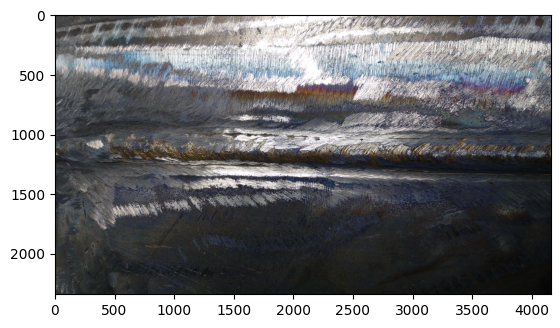

In [ ]:
for i, augmented_sample in enumerate(augmented_data):
  print(i)
  plt.imshow(augmented_sample.numpy()/255.0)

In [ ]:
i

0

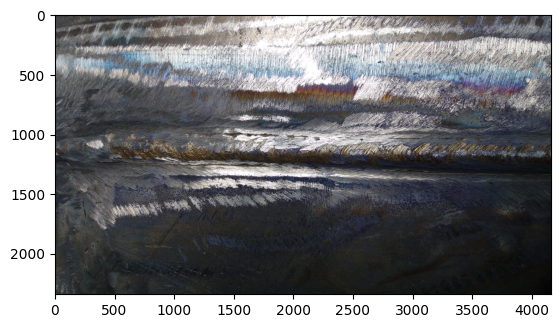

In [ ]:
plt.imshow(augmented_sample/255.0)

In [ ]:
for i, augmented_sample in enumerate(augmented_data):
    print(f"Step {i+1}:")
    plt.imshow(augmented_sample/255.0)

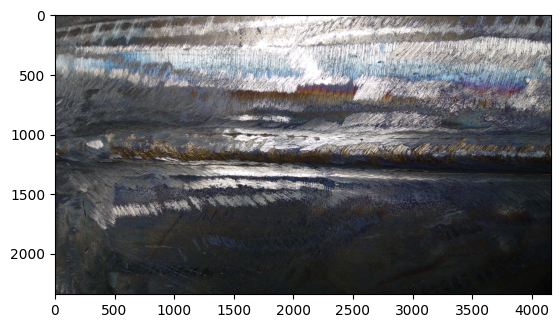

In [ ]:
plt.imshow(image)

In [ ]:
plt.imshow(augmented_data)

## 5 GAN & Augmentation

### 5.1 Overview

Using GANs (Generative Adversarial Networks) for data augmentation is a powerful technique to expand and diversify your dataset. GANs can generate synthetic data that resembles the original data distribution, providing additional training samples to improve the performance and generalization of your machine learning models.

**Here's a general outline of how to use GANs for data augmentation:**

1.	**Define Your GAN Architecture:**
  - Choose a GAN architecture suitable for your task, such as DCGAN (Deep Convolutional GAN), CGAN (Conditional GAN), or WGAN (Wasserstein GAN).
  - The GAN will consist of a generator network and a discriminator network that are trained adversarially.

2.	**Prepare Your Original Dataset**

  - Preprocess and normalize the real images in your dataset to a suitable range (typically [-1, 1] or [0, 1]).
  - This will ensure that the generated images also fall within the same range.

4.	**Implement the GAN:**

  - The generator network takes random noise as input and generates synthetic images
  - The discriminator network tries to distinguish between real and fake images.

5.	**Train the GAN:**
  - Train the GAN on your original dataset of real images.
  - The generator aims to produce realistic images to fool the discriminator, while the discriminator aims to correctly classify real and fake images

6.	**Generate Synthetic Data:**
  - After the GAN is trained, you can use the generator to produce synthetic images.
  - Input random noise into the generator, and it will generate images that resemble the real images in your original dataset.

7.	**Combine Real and Synthetic Data**





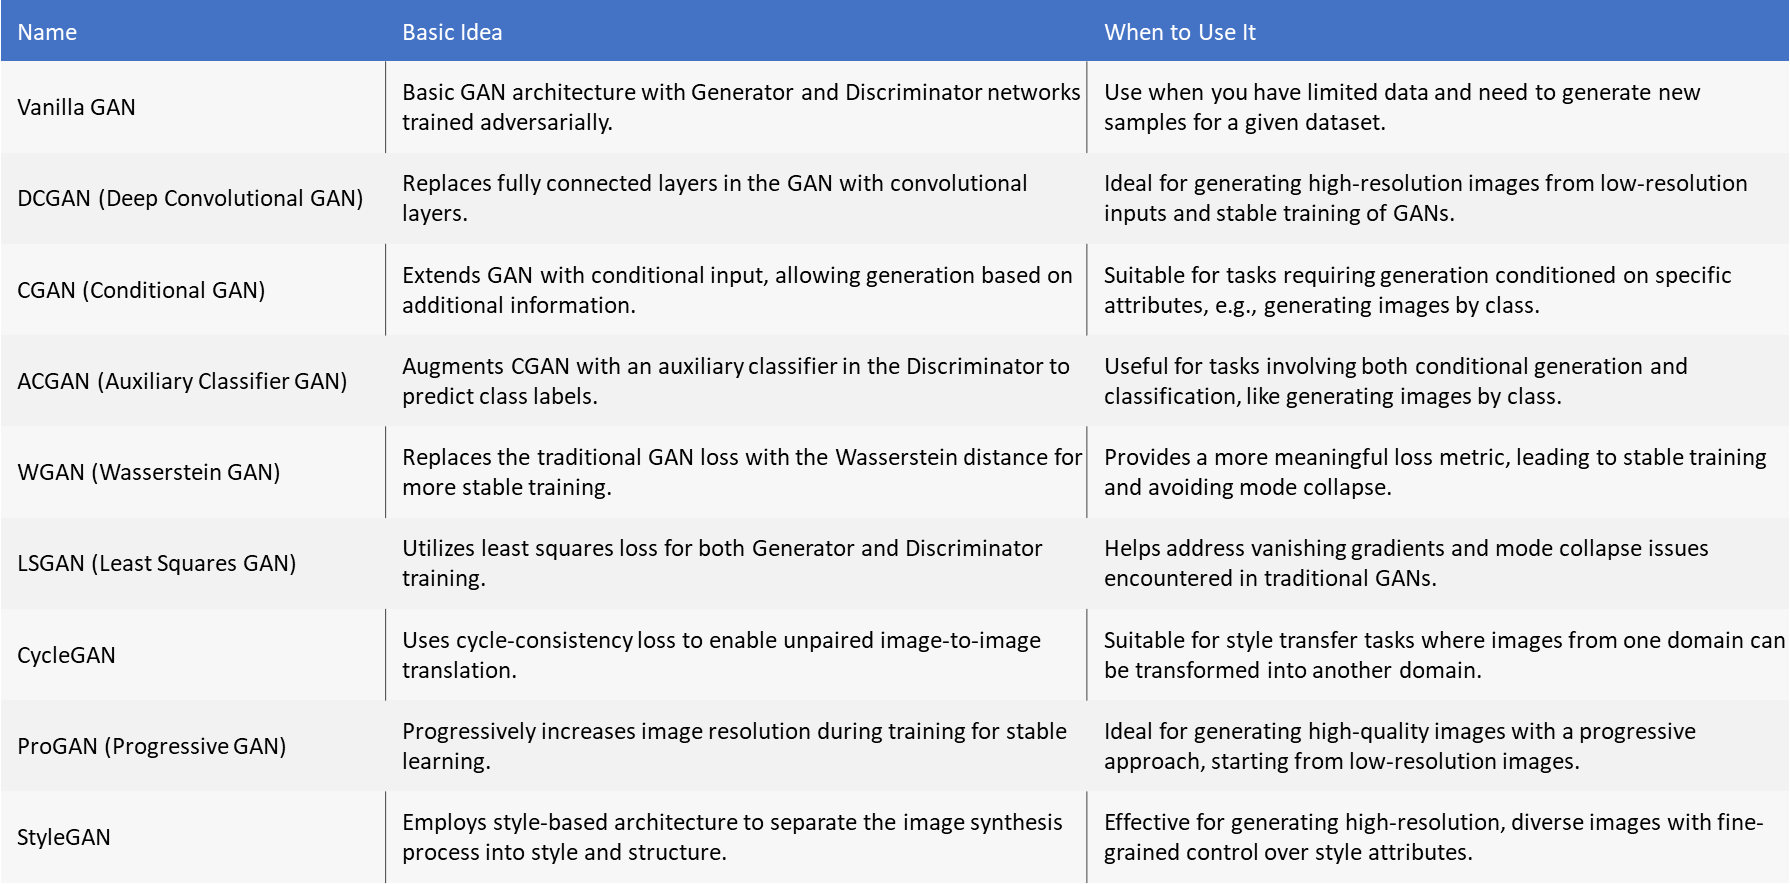

### 5.2 ChatGPT Code DCGAN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
## Step 2: Define the Generator model.
def build_generator():
    model = models.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model


In [ ]:
## Step 3: Define the Discriminator model.
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model


In [ ]:
## Step 4: Combine Generator and Discriminator to create the DCGAN.
def build_dcgan(generator, discriminator):
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)

    return model


In [ ]:
## Step 5: Load and preprocess the MNIST dataset.
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
## Step 6: Compile the DCGAN.
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                      loss=losses.BinaryCrossentropy(from_logits=True))

dcgan = build_dcgan(generator, discriminator)
dcgan.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
              loss=losses.BinaryCrossentropy(from_logits=True))


In [ ]:
## Step 7: Define the training loop.
def train_dcgan(dcgan, dataset, epochs=50, batch_size=128):
    for epoch in range(epochs):
        for batch in dataset:
            # Train the discriminator
            noise = tf.random.normal(shape=(batch_size, 100))
            generated_images = generator.predict(noise)

            real_images = batch

            combined_images = tf.concat([generated_images, real_images], axis=0)
            labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
            labels += 0.05 * tf.random.uniform(tf.shape(labels))

            d_loss = discriminator.train_on_batch(combined_images, labels)

            # Train the generator
            noise = tf.random.normal(shape=(batch_size, 100))
            misleading_labels = tf.zeros((batch_size, 1))

            g_loss = dcgan.train_on_batch(noise, misleading_labels)

        # Display progress
        print(f"Epoch {epoch + 1}/{epochs} | D Loss: {d_loss} | G Loss: {g_loss}")

        # Save and display generated images at the end of each epoch
        generate_and_save_images(generator, epoch + 1)
        display_generated_images(generator, epoch + 1)


In [ ]:
def display_generated_images(model, epoch, num_examples=16, dim=(4, 4), figsize=(10, 10)):
    noise = tf.random.normal(shape=(num_examples, 100))
    generated_images = model.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(num_examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i].reshape(28, 28), interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
## Step 8: Create a function to generate and save images.
def generate_and_save_images(model, epoch, num_examples=16, dim=(4, 4), figsize=(10, 10)):
    noise = tf.random.normal(shape=(num_examples, 100))
    generated_images = model.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(num_examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i].reshape(28, 28), interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'generated_images_epoch_{epoch}.png')
    plt.close()


In [ ]:
## Step 9: Train the DCGAN.
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(train_images.shape[0]).batch(batch_size)

epochs = 20
train_dcgan(dcgan, train_dataset, epochs=epochs, batch_size=batch_size)


4/4 [==============================] - 1s 219ms/step


ValueError: ignored